# Ⅰ. 주요 개념

# 1. BoW

### (1) Bag of Words 정의
- 자연어 처리나 정보 검색에서 쓰임
- 문서 내의 단어들의 분포를 보고 해당 문서의 특성을 파악하는 기법
- 단어들의 순서는 무시하고, 단어들의 빈도 정보만 보존


### (2) Bag of Words 구현해보기
   
1) keras Tokenizer 활용   
- 단어장(vocabulary) : 중복을 제거한 단어들의 집합. BOW와 다름. 자연어 처리에서 보편적으로 쓰이는 용어   
   
2) scikit-learn CountVectorizer 활용

# 2. DTM

### (1) DTM(Document-Term Matrix)
- 직역하면 "문서-단어 행렬"
- 각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합
- 문서를 행(document vector)으로, 단어를 열(word vector)

### (2) 코사인 유사도
- dot(A, B)/(norm(A)*norm(B))
- 0 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단
- 한 문서 내의 모든 단어의 빈도수가 똑같이 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1

### (3) DTM의 구현과 한계점
- 차원의 저주 : 문서와 단어의 수가 늘어날 수록 차원이 늘어나고 이를 연산하기 위한 저장공간이 늘어나는 반면 대부분은 0값을 가진다.
- 'the'와 같은 단어는 대부분의 문서에 포함되지만 문서의 특성을 특화하는데는 역할을 하지 않음

# 3. TF-IDF

### (1) TF-IDF 
- Term Frequency-Inverse Document Frequency. 직역하면 '단어빈도-역문서빈도'
- 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장한느 단어는 중요도가 높다고 판단하는 것
- 먼저 DTM를 만든 뒤, TF-IDF가중치를 DTM에 적용

### (2) TF-IDF 계산하기
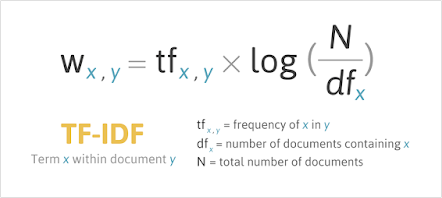

### (3) TF-IDF 구현하기
- TF-IDF 구현하기
- scikit-learn TFidVectorizer 활용

# 4. 데이터 셋
- 로이터 뉴스 데이터, 46개 클래스
- 대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공

# Ⅱ. 프로세스와 주요 함수/클래스

# 1. 프로세스 개요

## (1) 텍스트 분류(Text Classification)란 
- 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크
- 자연어 처리 태스크 중 가장 기본이 되면서, 비즈니스 영역에서도 가장 수요가 높다.
- 사용사례 :  '스팸 메일 자동 분류', '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류' 
 

## (2) 분류 프로세스
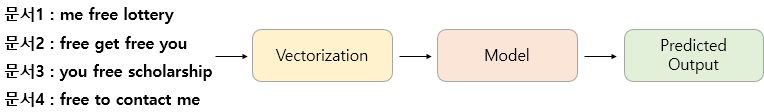
- 주어진 문장 또는 무서를 벡터화하고, 이를 AI모델에 입력값으로 넣어주면 모델은 예측한 카테고리를 리턴
- 딥러닝 : 벡터화 방법(임베딩), 모델(RNN, CNN, BERT)
- 머신러닝 : 이번 과제

## (2) 데이터 가져오기
### 1) 훈련 데이터와 테스트 데이터 로드하기
- 대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공

### 2) 데이터 분포 확인해보기
- 평균길이, 최대 길이
- 클래스별 분포 확인

### 3) 데이터 복원하기
- 본 데이터는 정수 시퀀스로 제공. 하지만 일반적인 경우 텍스트가 주어지고 벡터화 과정 수행
- 이를 위해 부득이하게 정수 시퀀스를 텍스트로 변환하여 다시 벡터화 작업 수행
- word_index 단어와 인덱스 번호 확인. 로이터는 +3로 부여됨
  - 0번, 1번, 2번은 사실 각각 \<pad>, \<sos>, \<unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호입니다.
- index_to_word로 텍스트로 복원

### 4) OOV문제와 UNK토큰
- 기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 함.
- 기계가 미처 배우지 못한 모르는 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) 이라고 표현함.
- 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 \<unk>라는 일관된 특별 토큰으로 변환

## (3) 데이터 전처리 및 벡터화

### 1) 벡터화
- 모델에 적용할 수 있도록 텍스트를 정수화 및 벡터화

### 2) 인공신경망 사용시 벡터화 방법
- Word Embedding, Document Embedding, Contextual Embedding

### 3) 머신러닝 사용시 벡터화 방법
-  Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬
- DTM을 기반으로 문서를 군집, 혹은 분류한다면 같은 단어가 많이 등장한 문서일수록 그 유사도가 높다고 판단할 수 있다. 불룡어는 모든 문서에 자주 등장하지만 실제로 중요한 의미를 가지지는 않으므로 이러한 가정에서는 성능 저하의 원인이 될 수 있다.
- TF-IDF행렬은 모든 문서에 걸쳐서 중요하다고 판단되는 단어에 가중치를 주는 효과를 가지고 있다. 만약, 모든 문서에 걸쳐서 자주 등장하는 단어라면 다른 단어들보다 중요도가 낮은 단어로 판단한다.
- TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성

## (4) 모델링
### 1) 나이브 베이즈 분류기
#### 베이즈 정리
- if A and B are cleary dependent.
- P(B|A) = P(A|B)*P(B) / P(A)
#### 나이브 베이즈 분류기(Multinominal Naive Bayes Classifier)
- 나이브 베이즈 분류기 : 사이킷런의 MultinomialNB()
- fit() : 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습
- 테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련 데이터와 동일한 전처리를 거쳐야 함.
- predict() : 예측값을 얻어 정확도 측정
 
### 2) Complement Naive Bayes Classifier(CNB)
- 컴플리먼트 나이브 베이즈 분류기 : 데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것
- 컴플리먼트 나이브 베이즈 분류기는 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋다.

### 3) 로지스틱 회귀(Logistic Regression)
- 로지스틱 회귀 : 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원 소프트맥스 회귀라고도 함.
- 사이킷런에서 소프트맥스 회귀는 LogisticRegression()을 통해서 구현

### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)
- 서포트 벡터 : decision boundary와 가장 가까운 각 클래스의 데이터를 서포트 벡터라고 함
- 사이킷런의 LinearSVC 또한 태생적으로는 이진 분류를 위한 모델
- 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있다. 
  바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법이다.
  일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.
  결국 클래스의 수만큼 이진 분류 모델이 만들어진다. 
  예측할 때는 만들어진 모든 이진 분류기가 작동하여
  가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.

### 5) 결정 트리(Decision Tree)
- 결정 트리는 분류와 회귀 문제에 널리 사용하는 모델
- 기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습함
- 사이킷런에서는 DecisionTreeClassifier()를 사용해서 결정 트리를 구현
- 결정 트리의 깊이 : max_depth라는 인자 설정가능
- 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다

### 6) 랜덤 포레스트(Random Forest)
- 앙상블(Ensemble)이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델
- 결정 트리는 훈련 데이터에 과적합되는 경향이 있음. 랜덤 포레스트는 이 문제를 앙상블로 해결, 서로 다른 방향으로 과적합된 트리들을 조합하면 오히려 모델 전체에서 과적합을 피할 수 있다.

### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)
- 그래디언트 부스팅 트리 : 여러 개의 결정 트리를 묶어 만드는 앙상블 모델
- 랜덤 포레스와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬.
- 일부 특성을 무시한다는 특징을 가지고 있다. 때문에 랜덤 포레스트를 먼저 사용해보고,
  성능이나 예측 시간 면에서 만족스럽지 않은 경우 그래디언트 부스팅 트리를 시도해 보는 것이 좋다.
- 일반적으로 1~5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠르다.
- 단점 : 훈련시간속도가 오래걸리고, 희소한 고차원 데이터에 대해서는 잘 작동되지 않는다.

### 8) 보팅(Voting)
- 투표를 통해 결과를 도출하는 모델
- 하드 보팅과 소프트 보팅 두가지로 나누어진다.
- 하드 보팅 : 결과물에 대한 최종값을 투표해서 결정
- 소프트 보팅 : 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값을 도출함.

## (5) 학습설계

## (6) 학습과 성과측정(F1-Score, Confusion Matrix)
### 1) Precision, Recall & F1 Score
- Accuracy는 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표
- label 불균형인 경우에는 이를 고려한 f1-score를 사용함.
- 사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공

### 2) Confusion Matrix
- TP는 True로 예측하고 실제 값도 True, 
- FN은 False로 예측하고 실제는 True

# 2. 패키지의 함수/클래스 개요

## (1) Python

## (2) Numpy

## (3) Pandas

## (4) tensorflow

## (5) 기타

# Ⅲ-1. TF-IDF기반 뉴스 카테로기 다중분류

## (1) 필요 패키지 설치

In [34]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 머신러닝 모델
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산



# F1-Score, Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# 딥러닝 모델
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
print('=3')

=3


In [35]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [3]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

print('=3')

=3


# 1. 모든 단어의 단어장, 머신러닝

## (1) 데이터 로드 및 벡터화

In [4]:
vocab_size = None
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

In [6]:
print('=====샘플 수 출력=====')
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
# 데이터 출력
print('\n=====데이터 출력=====')
print(x_train[0])
print(x_test[0])

# 클래스 수 확인
num_classes = max(y_train) + 1  # 인덱스 0부터 시작하므로 1 더해줌
print('\n클래스의 수 : {}'.format(num_classes))

=====샘플 수 출력=====
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246

=====데이터 출력=====
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 4

### 원본 뉴스 데이터로 복원해보기

In [7]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

# train 데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

# test 데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# 데이터 확인
print('학습 데이터')
print(x_train[:5])
print('테스트 데이터')
print(x_test[:5])

학습 데이터
['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3", '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share refle

###  벡터화 하기

In [8]:
dtmvector = CountVectorizer()                   # DTM벡터 인스턴스 생성
tfidf_transformer = TfidfTransformer()          # TF-IDF 인스턴스 생성

# train data
x_train_dtm = dtmvector.fit_transform(x_train)  
tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)
print('[학습 데이터]')
print('DTM    모양 : ', x_train_dtm.shape)
print('TF-IDF 모양 : ', tfidfv_train.shape)

# test data
x_test_dtm = dtmvector.transform(x_test)              #테스트 데이터를 DTM으로 변환
    # transform()메서드 : 학습데이터의 평균과 표준편차를 반영한 정규화
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print('\n[테스트 데이터]')
print('DTM    모양 : ', x_test_dtm.shape)
print('TF-IDF 모양 : ', tfidfv_test.shape)


[학습 데이터]
DTM    모양 :  (8982, 26506)
TF-IDF 모양 :  (8982, 26506)

[테스트 데이터]
DTM    모양 :  (2246, 26506)
TF-IDF 모양 :  (2246, 26506)


## (2) 머신러닝 모델 적용 및 성능

### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

정확도 Accuracy : 0.5997328584149599 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

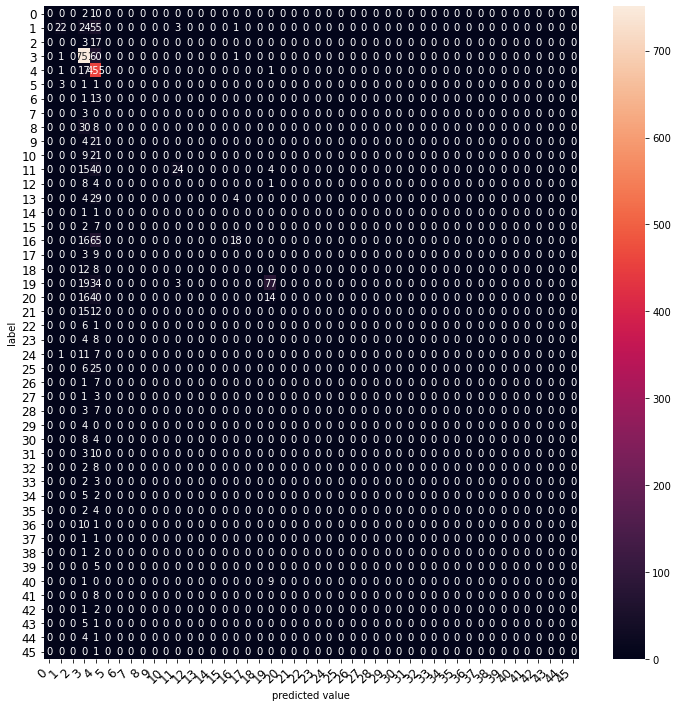

In [9]:
mnb = MultinomialNB()
mnb.fit(tfidfv_train, y_train)                # 모델 학습

predicted = mnb.predict(tfidfv_test)    #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n') 
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(mnb, tfidfv_test, y_test)

### 2) Complement Naive Bayes Classifier(CNB)

정확도 Accuracy : 0.7649154051647373 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16 

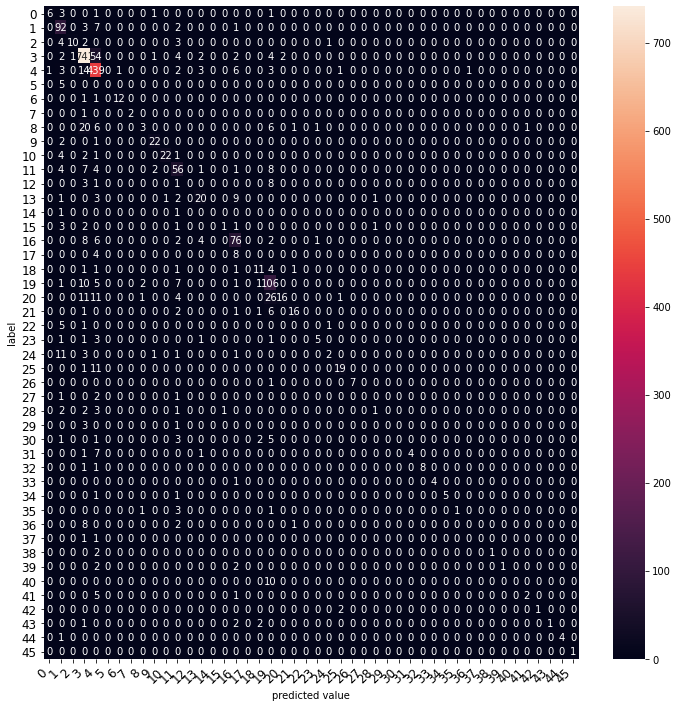

In [11]:
cb = ComplementNB()
cb.fit(tfidfv_train, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(cb, tfidfv_test, y_test)

### 3) 로지스틱 회귀(Logistic Regression)

정확도 Accuracy : 0.813446126447017 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.79      0.77       105
           2       0.70      0.70      0.70        20
           3       0.92      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.67      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.62      0.62      0.62        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16  

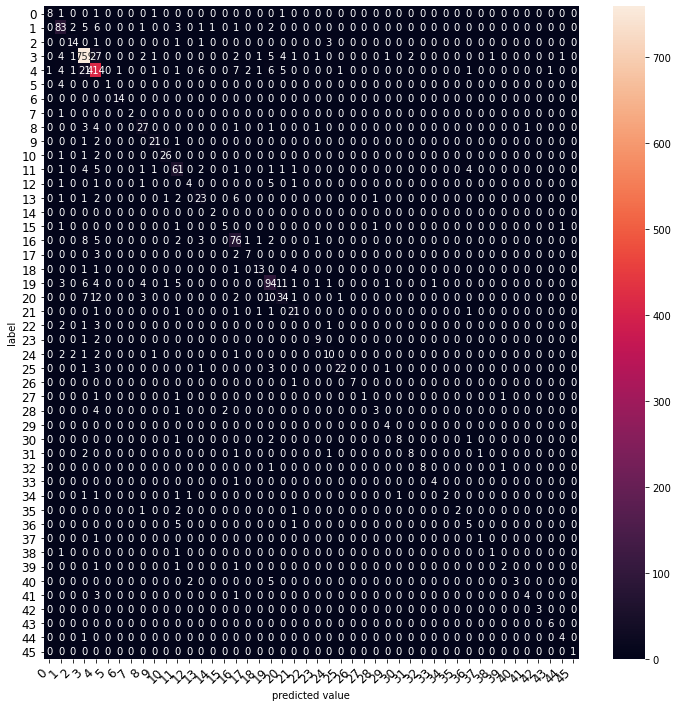

In [12]:
lr = LogisticRegression(C=26500, penalty='l2')
lr.fit(tfidfv_train, y_train)

predicted = lr.predict(tfidfv_test)                 #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(lr, tfidfv_test, y_test)

### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

정확도 Accuracy : 0.7043633125556545 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.62      0.62      0.62       105
           2       0.42      0.40      0.41        20
           3       0.90      0.89      0.89       813
           4       0.79      0.81      0.80       474
           5       0.25      0.20      0.22         5
           6       0.60      0.43      0.50        14
           7       0.50      0.33      0.40         3
           8       0.55      0.58      0.56        38
           9       0.68      0.60      0.64        25
          10       0.59      0.73      0.66        30
          11       0.50      0.65      0.57        83
          12       0.18      0.15      0.17        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       0.20      0.11      0.14         9
          16 

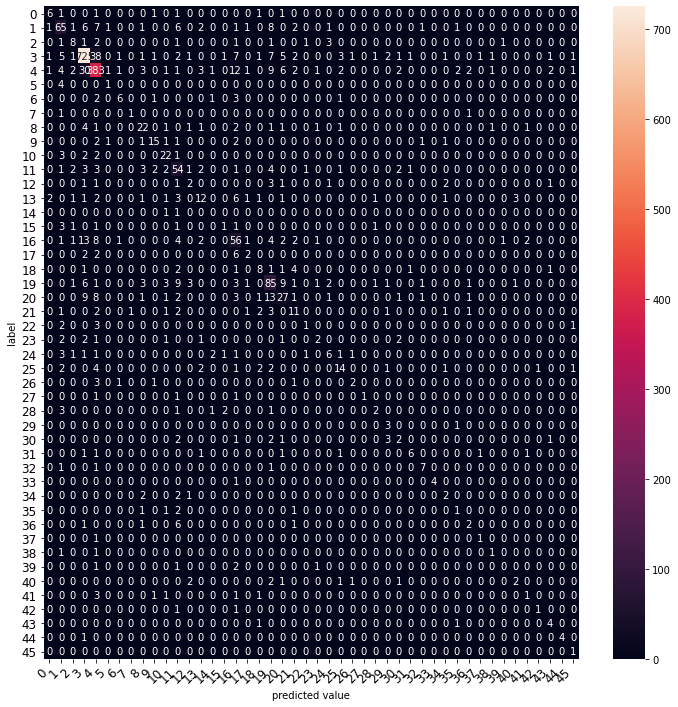

In [13]:
lsvc = LinearSVC(C=26500, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv_train, y_train)

predicted = lsvc.predict(tfidfv_test)               #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

### 5) 결정 트리(Decision Tree)

정확도 Accuracy : 0.6211041852181657 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.43      0.53       105
           2       0.75      0.45      0.56        20
           3       0.94      0.85      0.89       813
           4       0.40      0.89      0.55       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.89      0.80      0.84        30
          11       0.58      0.60      0.59        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

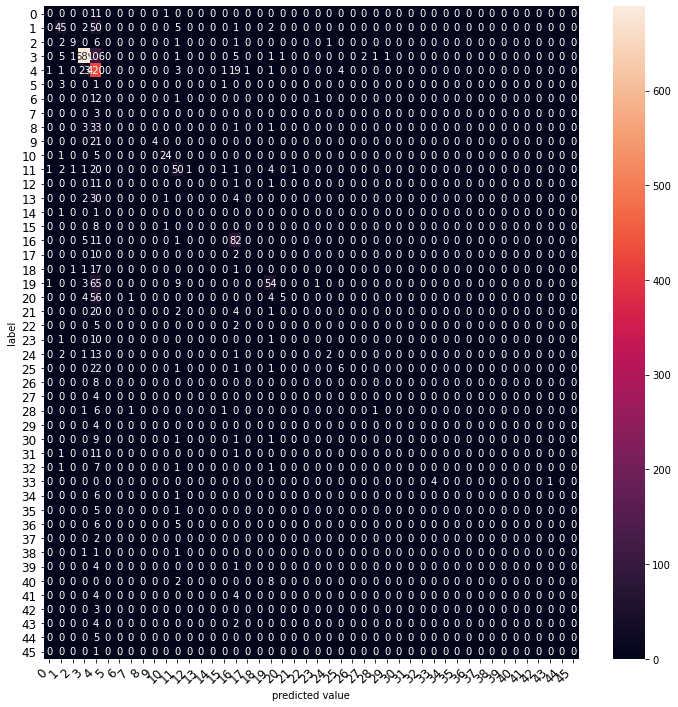

In [14]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv_train, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(tree, tfidfv_test, y_test)

### 6) 랜덤포레스트(Random Forest)

정확도 Accuracy : 0.6544968833481746 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.25      0.58      0.35        12
           1       0.35      0.60      0.44       105
           2       0.32      0.40      0.36        20
           3       0.82      0.89      0.85       813
           4       0.62      0.84      0.71       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.51      0.47      0.49        38
           9       1.00      0.28      0.44        25
          10       0.46      0.20      0.28        30
          11       0.56      0.64      0.60        83
          12       0.40      0.15      0.22        13
          13       0.33      0.16      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

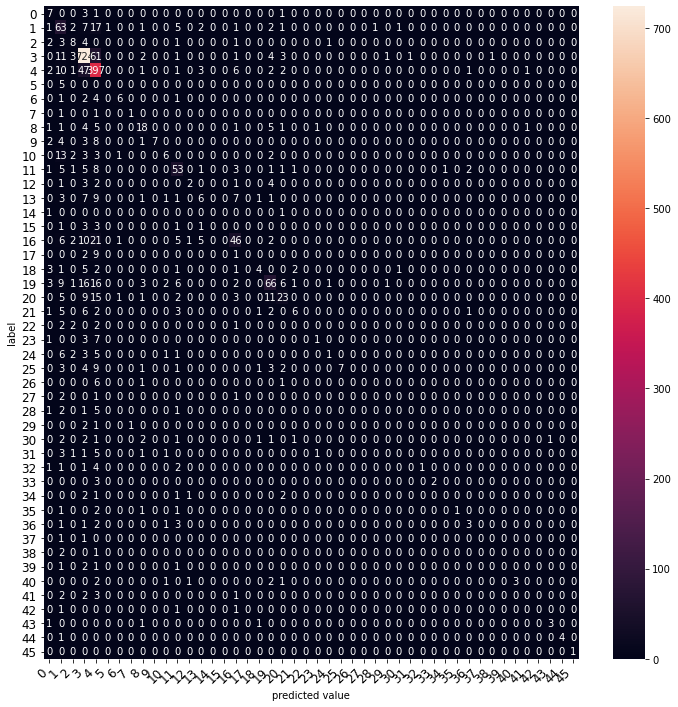

In [15]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv_train, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(forest, tfidfv_test, y_test)

### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)

정확도 Accuracy : 0.7702582368655387 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.81      0.71      0.76       105
           2       0.58      0.70      0.64        20
           3       0.87      0.91      0.89       813
           4       0.78      0.86      0.82       474
           5       1.00      0.20      0.33         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.60      0.63      0.62        38
           9       0.91      0.80      0.85        25
          10       0.79      0.77      0.78        30
          11       0.61      0.65      0.63        83
          12       0.50      0.46      0.48        13
          13       0.48      0.32      0.39        37
          14       0.00      0.00      0.00         2
          15       0.25      0.11      0.15         9
          16 

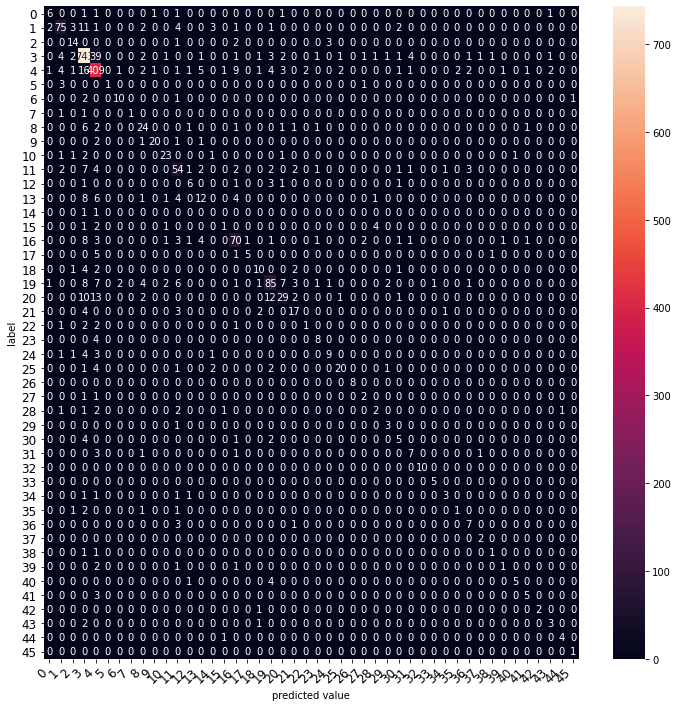

In [16]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv_train, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(grbt, tfidfv_test, y_test)

### 8) 보팅(Voting)

정확도 Accuracy : 0.8178984861976848 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.75      0.77       105
           2       0.67      0.80      0.73        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.67      0.80         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.66      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.67      0.65      0.66        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16 

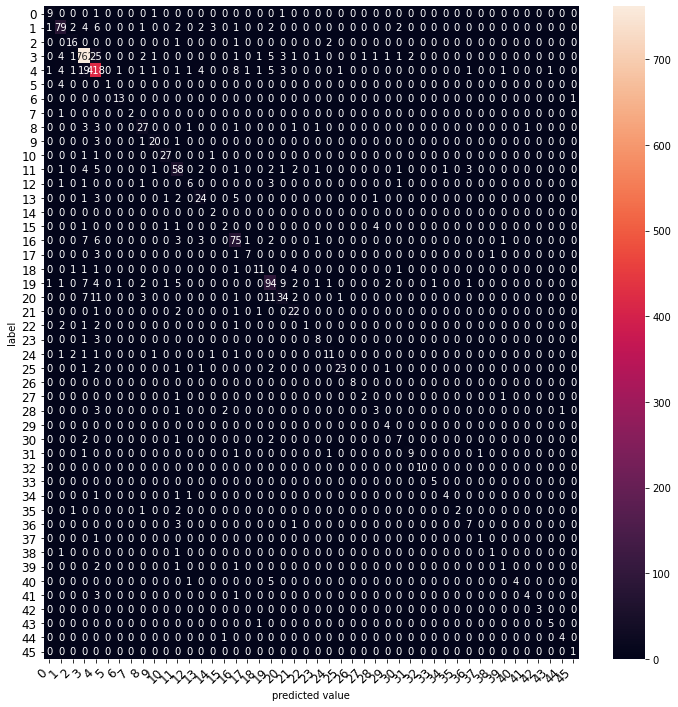

In [17]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=26500, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv_train, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

# 2. 5000 단어의 단어장, 머신러닝

## (1) 데이터 로드 및 벡터화

### 훈련 데이터와 테스트 데이터 로드하기

In [18]:
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

In [19]:
print('=====샘플 수 출력=====')
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
# 데이터 출력
print('\n=====데이터 출력=====')
print(x_train[0])
print(x_test[0])

# 클래스 수 확인
num_classes = max(y_train) + 1  # 인덱스 0부터 시작하므로 1 더해줌
print('\n클래스의 수 : {}'.format(num_classes))

=====샘플 수 출력=====
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246

=====데이터 출력=====
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47,

### 원본 뉴스 데이터로 복원해보기

In [20]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

# train 데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

# test 데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# 데이터 확인
print('학습 데이터')
print(x_train[:5])
print('테스트 데이터')
print(x_test[:5])

학습 데이터
['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the t

### 벡터화 하기

In [36]:
dtmvector = CountVectorizer()                   # DTM벡터 인스턴스 생성
tfidf_transformer = TfidfTransformer()          # TF-IDF 인스턴스 생성

# train data
x_train_dtm = dtmvector.fit_transform(x_train)  
tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)
print('[학습 데이터]')
print('DTM    모양 : ', x_train_dtm.shape)
print('TF-IDF 모양 : ', tfidfv_train.shape)

# test data
x_test_dtm = dtmvector.transform(x_test)              #테스트 데이터를 DTM으로 변환
    # transform()메서드 : 학습데이터의 평균과 표준편차를 반영한 정규화
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print('\n[테스트 데이터]')
print('DTM    모양 : ', x_test_dtm.shape)
print('TF-IDF 모양 : ', tfidfv_test.shape)


[학습 데이터]
DTM    모양 :  (8982, 14227)
TF-IDF 모양 :  (8982, 14227)

[테스트 데이터]
DTM    모양 :  (2246, 14227)
TF-IDF 모양 :  (2246, 14227)


## (2) 머신러닝 모델 적용 및 성능

### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

정확도 Accuracy : 0.6731967943009796 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

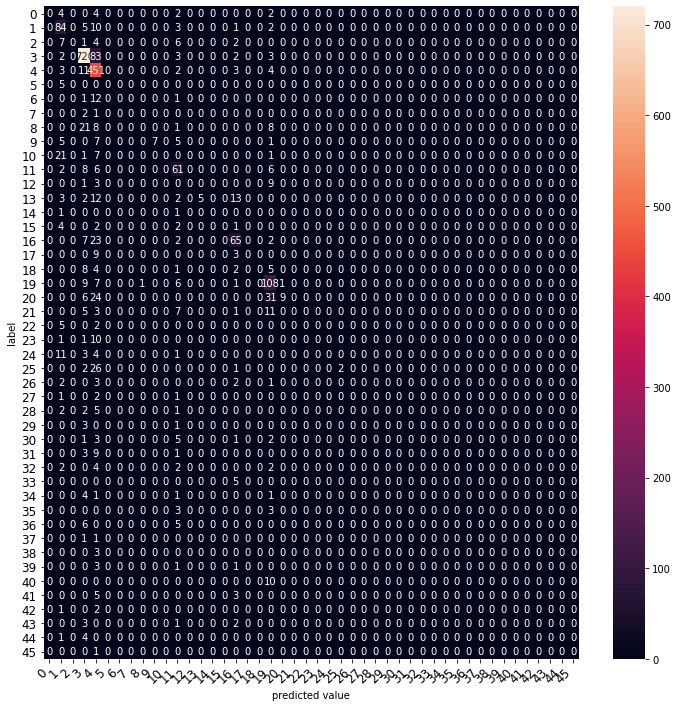

In [25]:
mnb = MultinomialNB()
mnb.fit(tfidfv_train, y_train)                # 모델 학습

predicted = mnb.predict(tfidfv_test)    #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n') 
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(mnb, tfidfv_test, y_test)

## (2) Complement Naive Bayes Classifier(CNB)

정확도 Accuracy : 0.7707034728406055 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

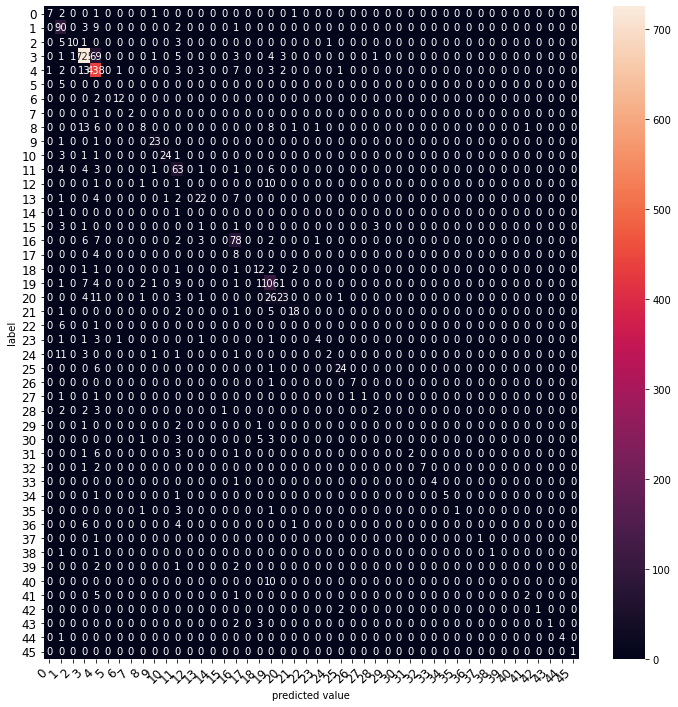

In [26]:
cb = ComplementNB()
cb.fit(tfidfv_train, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(cb, tfidfv_test, y_test)

### 3) 로지스틱 회귀(Logistic Regression)

정확도 Accuracy : 0.807212822796082 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.78      0.79      0.79       105
           2       0.74      0.85      0.79        20
           3       0.91      0.94      0.92       813
           4       0.81      0.86      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.67      0.74      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.87      0.90        30
          11       0.62      0.72      0.67        83
          12       0.57      0.31      0.40        13
          13       0.62      0.62      0.62        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16  

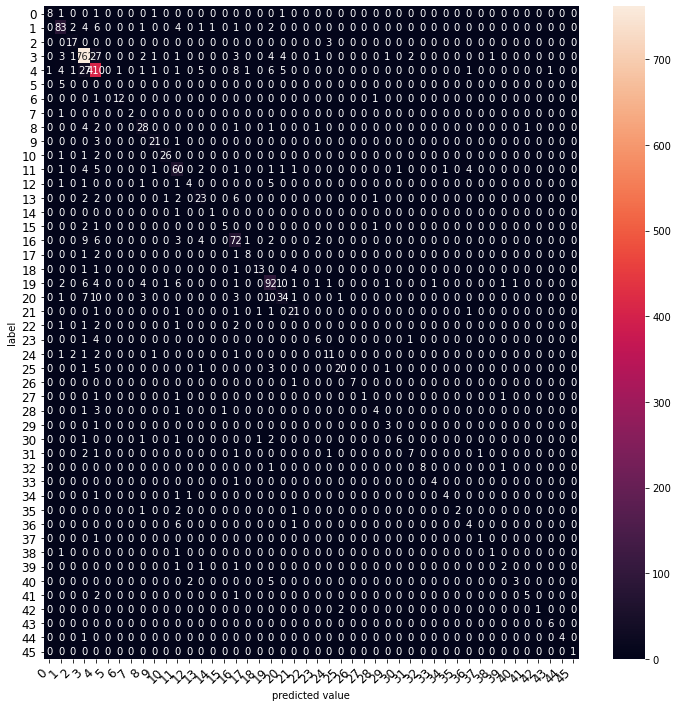

In [27]:
lr = LogisticRegression(C=5000, penalty='l2')
lr.fit(tfidfv_train, y_train)

predicted = lr.predict(tfidfv_test)                 #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(lr, tfidfv_test, y_test)

### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

정확도 Accuracy : 0.7417631344612645 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.66      0.70      0.68       105
           2       0.53      0.40      0.46        20
           3       0.90      0.90      0.90       813
           4       0.80      0.83      0.81       474
           5       0.00      0.00      0.00         5
           6       0.72      0.93      0.81        14
           7       1.00      0.33      0.50         3
           8       0.57      0.66      0.61        38
           9       0.56      0.72      0.63        25
          10       0.63      0.57      0.60        30
          11       0.59      0.72      0.65        83
          12       0.25      0.23      0.24        13
          13       0.46      0.49      0.47        37
          14       0.00      0.00      0.00         2
          15       0.33      0.22      0.27         9
          16 

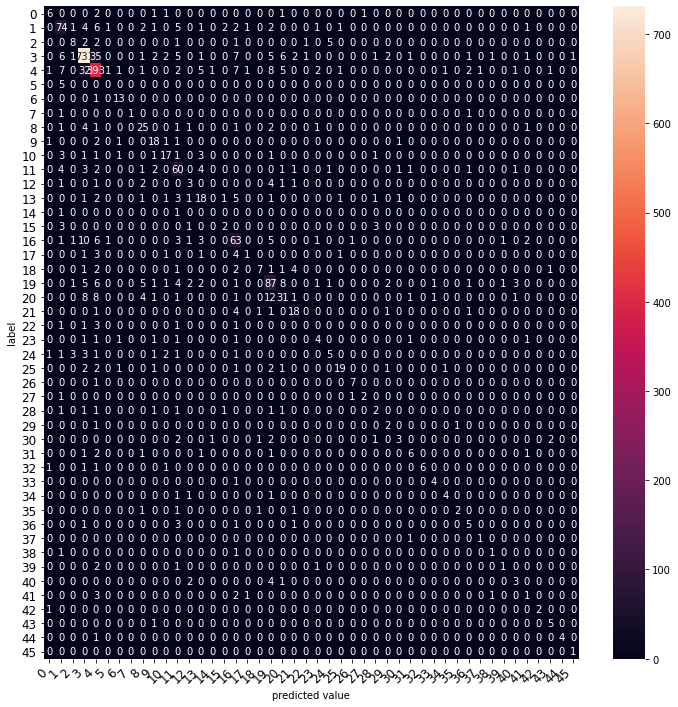

In [28]:
lsvc = LinearSVC(C=5000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv_train, y_train)

predicted = lsvc.predict(tfidfv_test)               #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

### 5) 결정 트리(Decision Tree)

정확도 Accuracy : 0.6179875333926982 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.40      0.52       105
           2       0.60      0.45      0.51        20
           3       0.94      0.84      0.89       813
           4       0.39      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.62      0.48      0.54        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

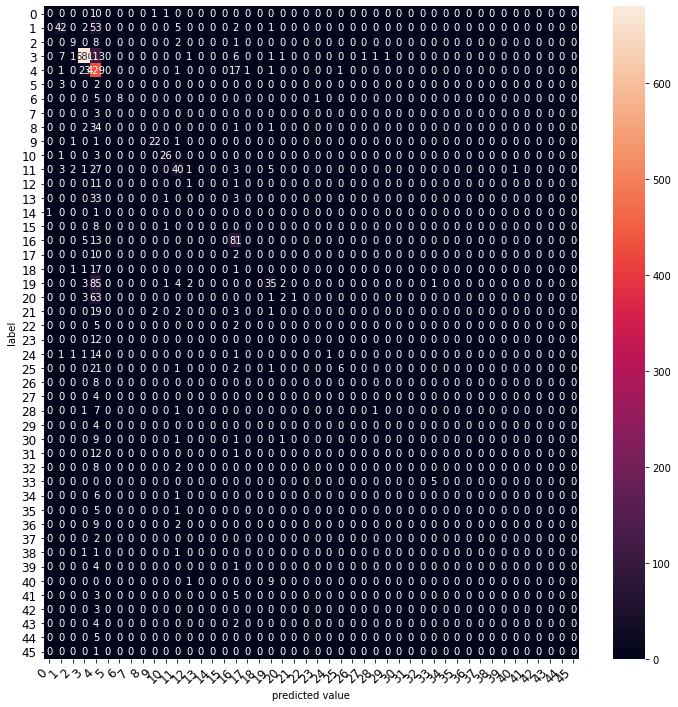

In [29]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv_train, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(tree, tfidfv_test, y_test)

### 6) 랜덤포레스트(Random Forest)

정확도 Accuracy : 0.701246660730187 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16  

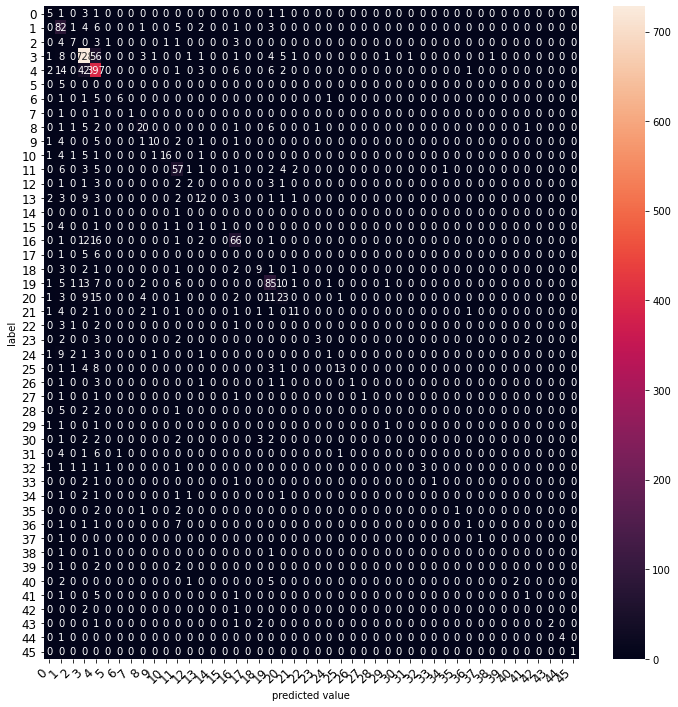

In [30]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv_train, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(forest, tfidfv_test, y_test)

### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)

정확도 Accuracy : 0.767586821015138 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.68      0.73       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.76      0.83      0.79       474
           5       0.14      0.20      0.17         5
           6       0.93      0.93      0.93        14
           7       0.50      0.33      0.40         3
           8       0.64      0.66      0.65        38
           9       0.91      0.84      0.87        25
          10       0.87      0.87      0.87        30
          11       0.62      0.66      0.64        83
          12       0.46      0.46      0.46        13
          13       0.55      0.43      0.48        37
          14       0.08      0.50      0.14         2
          15       0.33      0.22      0.27         9
          16  

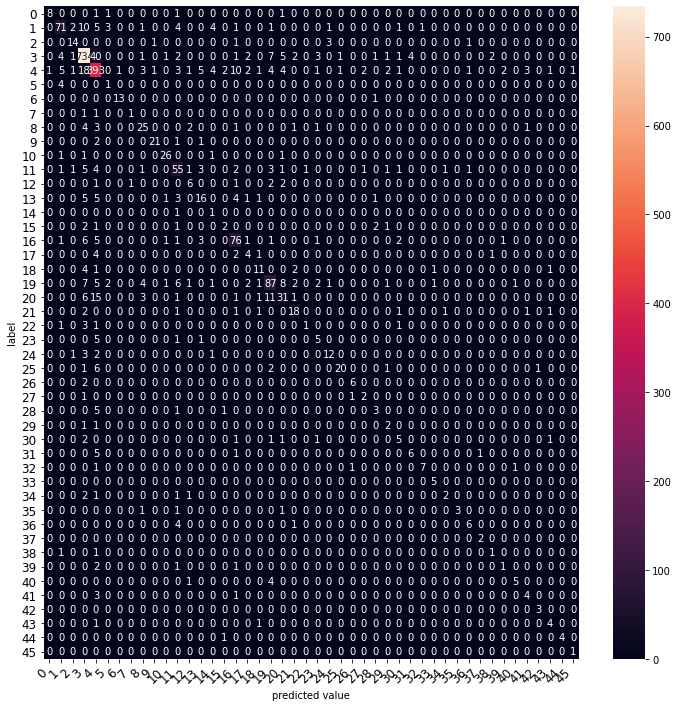

In [31]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv_train, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(grbt, tfidfv_test, y_test)

### 8) 보팅(Voting)

정확도 Accuracy : 0.8125556544968834 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.81      0.76      0.78       105
           2       0.70      0.80      0.74        20
           3       0.91      0.94      0.93       813
           4       0.82      0.87      0.84       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.66      0.69      0.67        83
          12       0.50      0.46      0.48        13
          13       0.68      0.62      0.65        37
          14       0.11      0.50      0.18         2
          15       0.67      0.44      0.53         9
          16 

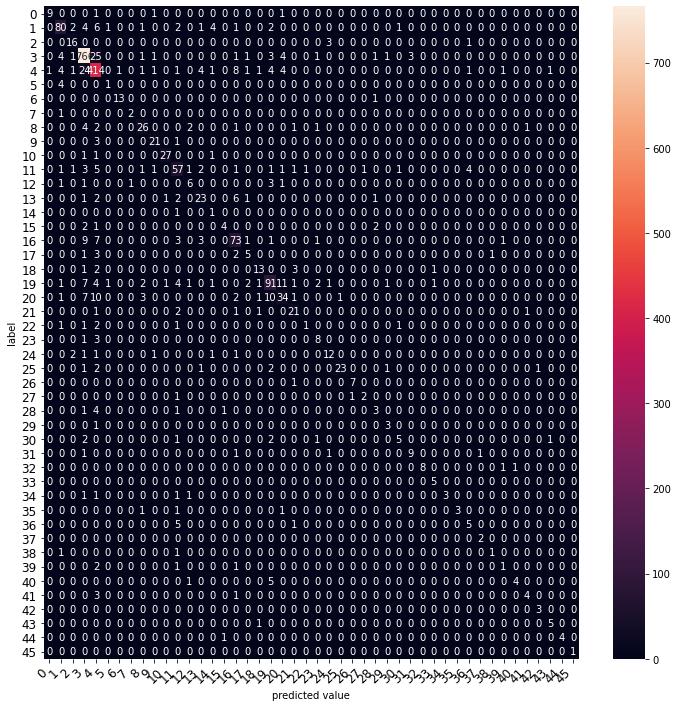

In [32]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=5000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv_train, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

# 3. 15000개 단어 단어장, 머신러닝

## (1) 데이터 로딩 및 벡터화

### 훈련 데이터와 테스트 데이터 로드하기

In [33]:
vocab_size = 15000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

In [34]:
print('=====샘플 수 출력=====')
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
# 데이터 출력
print('\n=====데이터 출력=====')
print(x_train[0])
print(x_test[0])

# 클래스 수 확인
num_classes = max(y_train) + 1  # 인덱스 0부터 시작하므로 1 더해줌
print('\n클래스의 수 : {}'.format(num_classes))

=====샘플 수 출력=====
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246

=====데이터 출력=====
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47,

### 원본 뉴스 데이터로 복원해보기

In [35]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

# train 데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

# test 데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# 데이터 확인
print('학습 데이터')
print(x_train[:5])
print('테스트 데이터')
print(x_test[:5])

학습 데이터
['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two 

### 벡터화 하기

In [37]:
dtmvector = CountVectorizer()                   # DTM벡터 인스턴스 생성
tfidf_transformer = TfidfTransformer()          # TF-IDF 인스턴스 생성

# train data
x_train_dtm = dtmvector.fit_transform(x_train)  
tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)
print('[학습 데이터]')
print('DTM    모양 : ', x_train_dtm.shape)
print('TF-IDF 모양 : ', tfidfv_train.shape)

# test data
x_test_dtm = dtmvector.transform(x_test)              #테스트 데이터를 DTM으로 변환
    # transform()메서드 : 학습데이터의 평균과 표준편차를 반영한 정규화
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print('\n[테스트 데이터]')
print('DTM    모양 : ', x_test_dtm.shape)
print('TF-IDF 모양 : ', tfidfv_test.shape)


[학습 데이터]
DTM    모양 :  (8982, 14227)
TF-IDF 모양 :  (8982, 14227)

[테스트 데이터]
DTM    모양 :  (2246, 14227)
TF-IDF 모양 :  (2246, 14227)


## (2) 머신러닝 모델 적용 및 성능

### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

정확도 Accuracy : 0.6331255565449688 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.77      0.53      0.63       105
           2       0.00      0.00      0.00        20
           3       0.77      0.91      0.84       813
           4       0.47      0.96      0.63       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.69      0.40      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

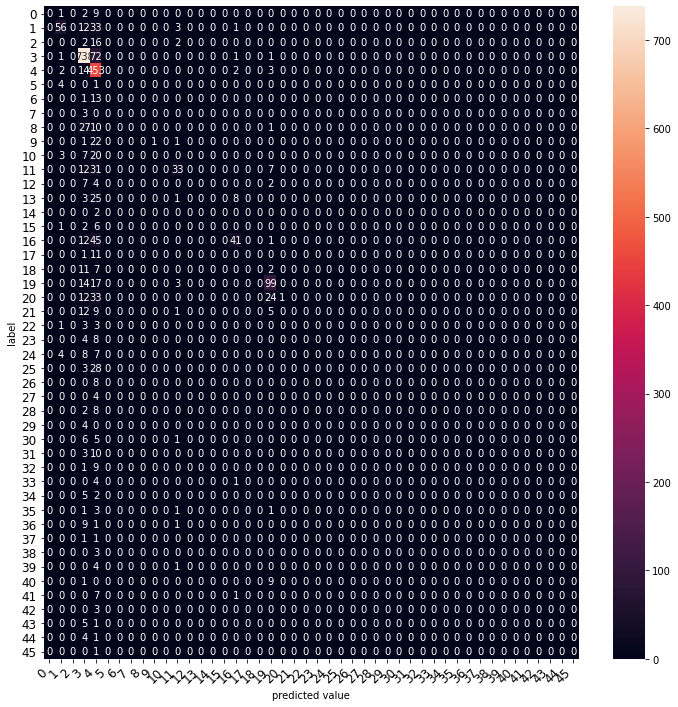

In [38]:
mnb = MultinomialNB()
mnb.fit(tfidfv_train, y_train)                # 모델 학습

predicted = mnb.predict(tfidfv_test)    #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n') 
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(mnb, tfidfv_test, y_test)

### 2) Complement Naive Bayes Classifier(CNB)

정확도 Accuracy : 0.7720391807658059 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.65      0.90      0.76       105
           2       0.91      0.50      0.65        20
           3       0.90      0.90      0.90       813
           4       0.76      0.93      0.84       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.71      0.61        83
          12       0.00      0.00      0.00        13
          13       0.60      0.57      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16 

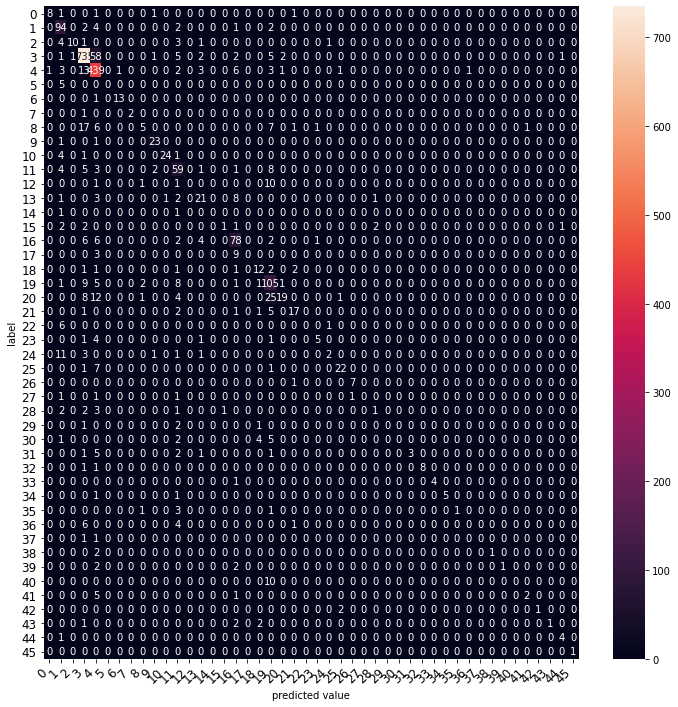

In [40]:
cb = ComplementNB()
cb.fit(tfidfv_train, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(cb, tfidfv_test, y_test)

### 3) 로지스틱 회귀(Logistic Regression)

정확도 Accuracy : 0.8103294746215495 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.78      0.78      0.78       105
           2       0.71      0.75      0.73        20
           3       0.91      0.93      0.92       813
           4       0.80      0.87      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.64      0.71      0.67        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.69        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.83      0.56      0.67         9
          16 

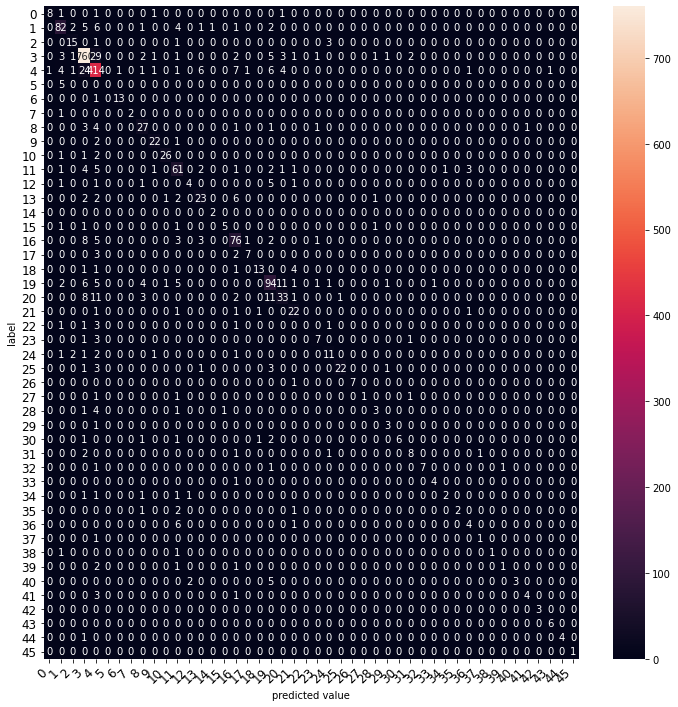

In [41]:
lr = LogisticRegression(C=15000, penalty='l2')
lr.fit(tfidfv_train, y_train)

predicted = lr.predict(tfidfv_test)                 #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(lr, tfidfv_test, y_test)

### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

정확도 Accuracy : 0.7181656277827249 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.61      0.69      0.64       105
           2       0.53      0.40      0.46        20
           3       0.91      0.89      0.90       813
           4       0.77      0.80      0.78       474
           5       0.00      0.00      0.00         5
           6       0.62      0.71      0.67        14
           7       0.50      0.33      0.40         3
           8       0.51      0.66      0.57        38
           9       0.62      0.64      0.63        25
          10       0.58      0.63      0.60        30
          11       0.55      0.65      0.60        83
          12       0.50      0.38      0.43        13
          13       0.40      0.32      0.36        37
          14       0.00      0.00      0.00         2
          15       0.25      0.11      0.15         9
          16 

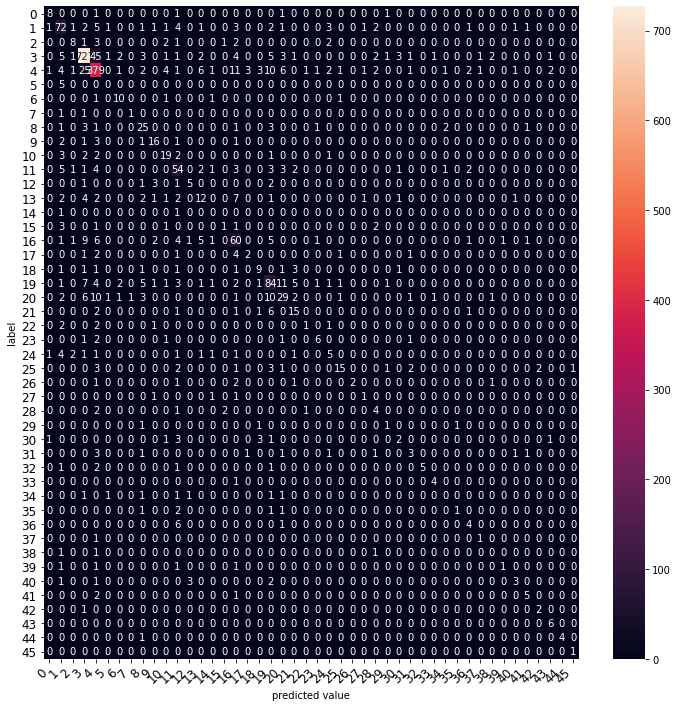

In [42]:
lsvc = LinearSVC(C=15000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv_train, y_train)

predicted = lsvc.predict(tfidfv_test)               #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

### 5) 결정 트리(Decision Tree)

정확도 Accuracy : 0.6193232413178985 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.73      0.42      0.53       105
           2       0.75      0.45      0.56        20
           3       0.94      0.83      0.88       813
           4       0.40      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.86      0.80      0.83        30
          11       0.64      0.49      0.56        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

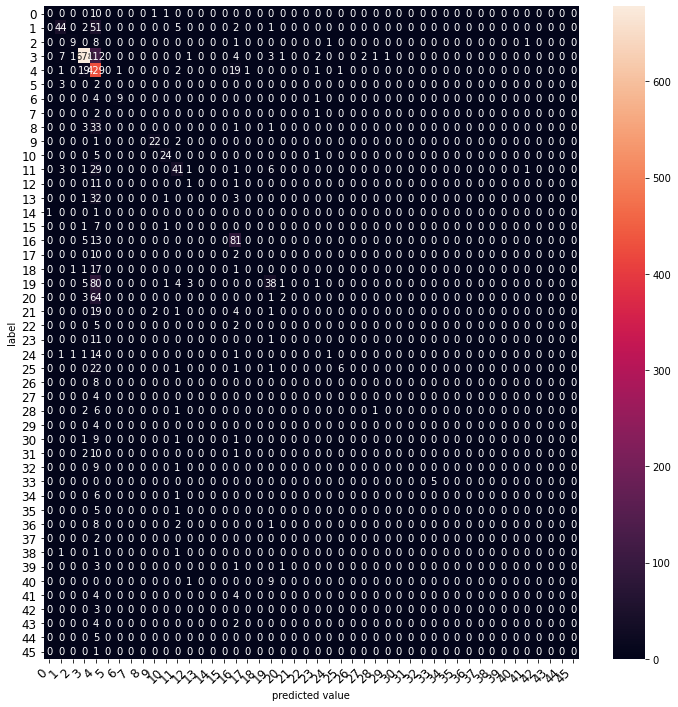

In [43]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv_train, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(tree, tfidfv_test, y_test)

### 6) 랜덤포레스트(Random Forest)

정확도 Accuracy : 0.6714158504007124 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.25      0.50      0.33        12
           1       0.42      0.69      0.52       105
           2       0.13      0.10      0.11        20
           3       0.81      0.90      0.85       813
           4       0.65      0.85      0.74       474
           5       0.00      0.00      0.00         5
           6       0.83      0.36      0.50        14
           7       0.50      0.67      0.57         3
           8       0.62      0.53      0.57        38
           9       0.71      0.40      0.51        25
          10       0.60      0.20      0.30        30
          11       0.45      0.51      0.47        83
          12       0.60      0.23      0.33        13
          13       0.40      0.22      0.28        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

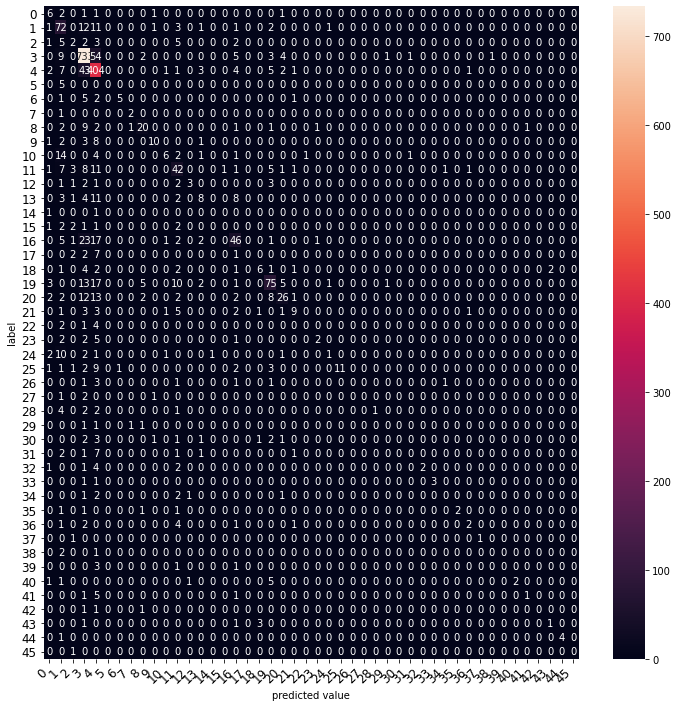

In [44]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv_train, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(forest, tfidfv_test, y_test)

### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)

정확도 Accuracy : 0.7707034728406055 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.70      0.75       105
           2       0.62      0.65      0.63        20
           3       0.87      0.91      0.89       813
           4       0.78      0.84      0.81       474
           5       0.00      0.00      0.00         5
           6       0.83      0.71      0.77        14
           7       1.00      0.67      0.80         3
           8       0.59      0.63      0.61        38
           9       0.86      0.76      0.81        25
          10       0.86      0.80      0.83        30
          11       0.64      0.67      0.66        83
          12       0.35      0.54      0.42        13
          13       0.54      0.41      0.46        37
          14       0.08      0.50      0.13         2
          15       0.38      0.33      0.35         9
          16 

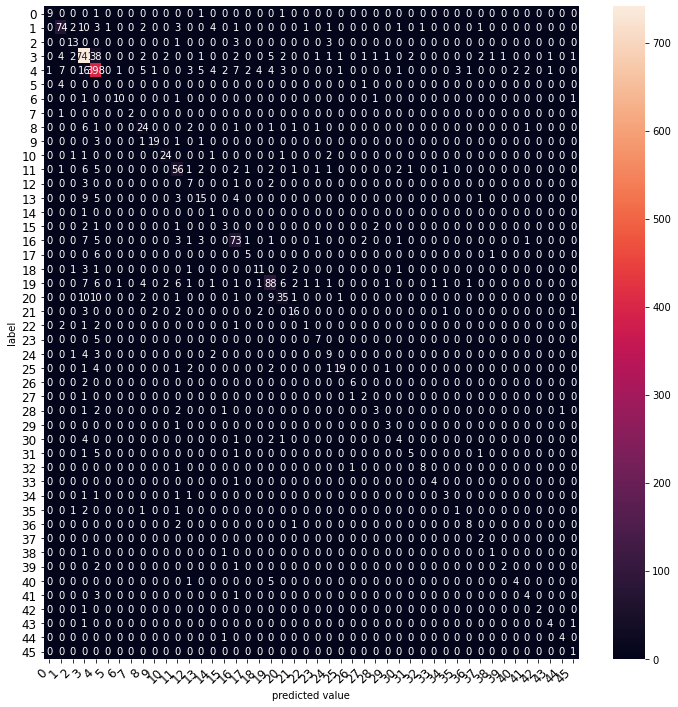

In [45]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv_train, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(grbt, tfidfv_test, y_test)

### 8) 보팅(Voting)

정확도 Accuracy : 0.8130008904719501 

[Precision, Recall & F1 Score]
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.78      0.74      0.76       105
           2       0.68      0.75      0.71        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.67      0.68      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.66      0.71      0.69        83
          12       0.46      0.46      0.46        13
          13       0.68      0.62      0.65        37
          14       0.17      1.00      0.29         2
          15       0.57      0.44      0.50         9
          16 

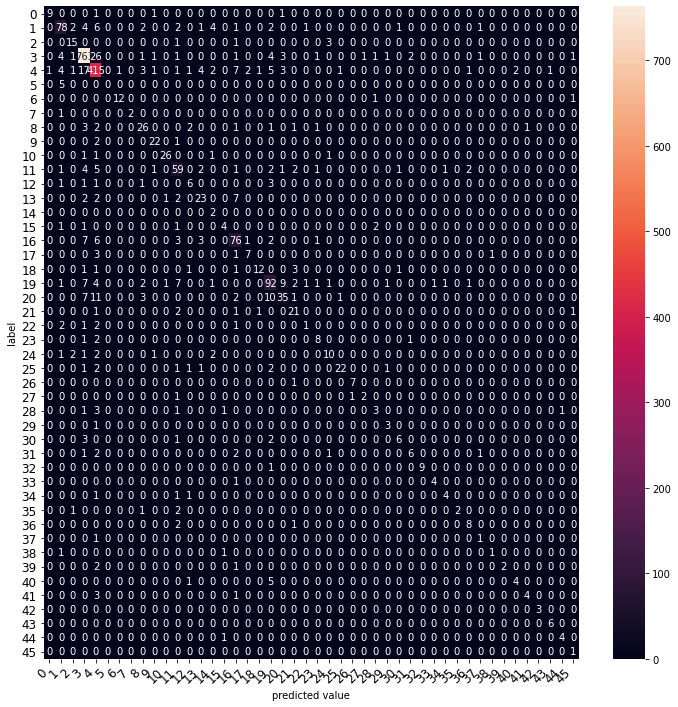

In [46]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=15000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv_train, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측

# Accuracy #예측값과 실제값 비교
print("정확도 Accuracy :", accuracy_score(y_test, predicted), '\n')
# Precision, Recall & F1 Score
print('[Precision, Recall & F1 Score]\n', classification_report(y_test, predicted, zero_division=0))
# Confusion Matrix
print('\n[Confusion Matrix]')
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

# 4. 딥러닝

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

## (1) 1D-CNN

### 1) 전체단어

In [14]:
vocab_size=30000   # None으로하면 타입에러 발생해서 30k반영
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)
print(X_train[:5])

[list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 

In [15]:
max_len = 2376   # RNN 모델의 것을 가져옴.
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train의 크기(shape) :', X_train.shape)
print('X_test의 크기(shape) :', X_test.shape)

print('\ny_train 샘플(처음 5개) :', y_train[:5])

X_train의 크기(shape) : (8982, 2376)
X_test의 크기(shape) : (2246, 2376)

y_train 샘플(처음 5개) : [3 4 3 4 4]


In [16]:
# 하이퍼파라미터
embedding_dim = 256   # vocab_size = len(index_to_word)   256 
dropout_ratio = 0.3
num_filters = 256     # 256
kernel_size = 3          # 3
hidden_units = 128

# 딥러닝 모델 설계
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         7680000   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 256)         196864    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 46)               

In [17]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/50
281/281 [==============================] - 54s 180ms/step - loss: 2.3294 - acc: 0.4552 - val_loss: 1.2678 - val_acc: 0.6990

Epoch 00001: val_acc improved from -inf to 0.69902, saving model to best_model.h5
Epoch 2/50
281/281 [==============================] - 48s 169ms/step - loss: 1.1412 - acc: 0.7325 - val_loss: 0.9559 - val_acc: 0.7787

Epoch 00002: val_acc improved from 0.69902 to 0.77872, saving model to best_model.h5
Epoch 3/50
281/281 [==============================] - 48s 170ms/step - loss: 0.7986 - acc: 0.8106 - val_loss: 0.8443 - val_acc: 0.8019

Epoch 00003: val_acc improved from 0.77872 to 0.80187, saving model to best_model.h5
Epoch 4/50
281/281 [==============================] - 48s 170ms/step - loss: 0.5931 - acc: 0.8540 - val_loss: 0.8193 - val_acc: 0.8081

Epoch 00004: val_acc improved from 0.80187 to 0.80810, saving model to best_model.h5
Epoch 5/50
281/281 [==============================] - 48s 171ms/step - loss: 0.4279 - acc: 0.8935 - val_loss: 0.8293 - 

In [19]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도: %.4f' % (loaded_model.evaluate(X_test,y_test)[1]))

71/71 [==============================] - 3s 41ms/step - loss: 0.8293 - acc: 0.8112

 테스트 정확도: 0.8112


### 2) 1D-CNN(5k)

In [20]:
vocab_size=5000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)
print(X_train[:5])

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 2, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 

In [21]:
max_len = 2376   # RNN 모델의 것을 가져옴.
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train의 크기(shape) :', X_train.shape)
print('X_test의 크기(shape) :', X_test.shape)

print('\ny_train 샘플(처음 5개) :', y_train[:5])

X_train의 크기(shape) : (8982, 2376)
X_test의 크기(shape) : (2246, 2376)

y_train 샘플(처음 5개) : [3 4 3 4 4]


In [22]:
# 하이퍼파라미터
embedding_dim = 256   # vocab_size = len(index_to_word)   256 
dropout_ratio = 0.3
num_filters = 256     # 256
kernel_size = 3          # 3
hidden_units = 128

# 딥러닝 모델 설계
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 256)         196864    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/50
281/281 [==============================] - 37s 131ms/step - loss: 2.2743 - acc: 0.4697 - val_loss: 1.2621 - val_acc: 0.7119

Epoch 00001: val_acc improved from -inf to 0.71193, saving model to best_model.h5
Epoch 2/50
281/281 [==============================] - 37s 131ms/step - loss: 1.1358 - acc: 0.7360 - val_loss: 0.9894 - val_acc: 0.7622

Epoch 00002: val_acc improved from 0.71193 to 0.76224, saving model to best_model.h5
Epoch 3/50
281/281 [==============================] - 37s 131ms/step - loss: 0.8371 - acc: 0.7979 - val_loss: 0.8418 - val_acc: 0.7947

Epoch 00003: val_acc improved from 0.76224 to 0.79475, saving model to best_model.h5
Epoch 4/50
281/281 [==============================] - 37s 131ms/step - loss: 0.6176 - acc: 0.8448 - val_loss: 0.7922 - val_acc: 0.8117

Epoch 00004: val_acc improved from 0.79475 to 0.81167, saving model to best_model.h5
Epoch 5/50
281/281 [==============================] - 37s 131ms/step - loss: 0.4911 - acc: 0.8752 - val_loss: 0.8071 - 

In [25]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도: %.4f' % (loaded_model.evaluate(X_test,y_test)[1]))

71/71 [==============================] - 3s 41ms/step - loss: 0.8259 - acc: 0.8157

 테스트 정확도: 0.8157


### 3) 1D-CNN(15k)

In [26]:
vocab_size=15000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)
print(X_train[:5])

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90,

In [27]:
max_len = 2376   # RNN 모델의 것을 가져옴.
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train의 크기(shape) :', X_train.shape)
print('X_test의 크기(shape) :', X_test.shape)

print('\ny_train 샘플(처음 5개) :', y_train[:5])

X_train의 크기(shape) : (8982, 2376)
X_test의 크기(shape) : (2246, 2376)

y_train 샘플(처음 5개) : [3 4 3 4 4]


In [28]:
# 하이퍼파라미터
embedding_dim = 256   # vocab_size = len(index_to_word)   256 
dropout_ratio = 0.3
num_filters = 256     # 256
kernel_size = 3          # 3
hidden_units = 128

# 딥러닝 모델 설계
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         3840000   
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 256)         196864    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 46)               

In [29]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/50
281/281 [==============================] - 42s 147ms/step - loss: 2.2586 - acc: 0.4689 - val_loss: 1.3131 - val_acc: 0.6928

Epoch 00001: val_acc improved from -inf to 0.69279, saving model to best_model.h5
Epoch 2/50
281/281 [==============================] - 41s 147ms/step - loss: 1.1734 - acc: 0.7307 - val_loss: 1.0028 - val_acc: 0.7716

Epoch 00002: val_acc improved from 0.69279 to 0.77159, saving model to best_model.h5
Epoch 3/50
281/281 [==============================] - 41s 147ms/step - loss: 0.7943 - acc: 0.8116 - val_loss: 0.9065 - val_acc: 0.7832

Epoch 00003: val_acc improved from 0.77159 to 0.78317, saving model to best_model.h5
Epoch 4/50
281/281 [==============================] - 41s 147ms/step - loss: 0.6171 - acc: 0.8504 - val_loss: 0.8599 - val_acc: 0.7970

Epoch 00004: val_acc improved from 0.78317 to 0.79697, saving model to best_model.h5
Epoch 5/50
281/281 [==============================] - 41s 147ms/step - loss: 0.4261 - acc: 0.8911 - val_loss: 0.8701 - 

In [31]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도: %.4f' % (loaded_model.evaluate(X_test,y_test)[1]))

71/71 [==============================] - 3s 41ms/step - loss: 0.9623 - acc: 0.8077

 테스트 정확도: 0.8077


## (2) RNN

### 1) 전체단어

In [61]:
(rnn_x_train, rnn_y_train), (rnn_x_test, rnn_y_test) = reuters.load_data(num_words=None, test_split=0.2)
print(len(rnn_x_train), len(rnn_x_test))

max_len = max(len(l) for l in np.concatenate((rnn_x_train, rnn_x_test), axis=0))
print('max_len : ', max_len)

word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

8982 2246
max_len :  2376


In [62]:
rnn_x_train = pad_sequences(rnn_x_train, maxlen=max_len)
rnn_x_test = pad_sequences(rnn_x_test, maxlen=max_len)

rnn_y_train = to_categorical(rnn_y_train, num_classes=46)
rnn_y_test = to_categorical(rnn_y_test, num_classes=46)

rnn_x_train = rnn_x_train[1000:]
rnn_y_train = rnn_y_train[1000:]
rnn_x_val = rnn_x_train[:1000]
rnn_y_val = rnn_y_train[:1000]

In [66]:
vocab_size = len(index_to_word)
print(vocab_size)
word_vector_dim = 128
hidden_units = 128
num_classes = 46

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(keras.layers.LSTM(hidden_units))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
# 모델 훈련
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(rnn_x_train, rnn_y_train, epochs=50, callbacks=[es], batch_size=128, validation_data=(rnn_x_val, rnn_y_val), verbose=1)

30982
Epoch 1/50
63/63 [==============================] - 34s 515ms/step - loss: 3.0829 - accuracy: 0.3059 - val_loss: 2.4110 - val_accuracy: 0.4480
Epoch 2/50
63/63 [==============================] - 32s 504ms/step - loss: 2.2213 - accuracy: 0.4333 - val_loss: 2.0302 - val_accuracy: 0.4930
Epoch 3/50
63/63 [==============================] - 32s 504ms/step - loss: 1.9238 - accuracy: 0.5079 - val_loss: 1.7931 - val_accuracy: 0.5370
Epoch 4/50
63/63 [==============================] - 32s 503ms/step - loss: 1.7144 - accuracy: 0.5527 - val_loss: 1.6943 - val_accuracy: 0.5560
Epoch 5/50
63/63 [==============================] - 32s 503ms/step - loss: 1.5628 - accuracy: 0.6103 - val_loss: 1.5500 - val_accuracy: 0.6330
Epoch 6/50
63/63 [==============================] - 32s 505ms/step - loss: 1.3892 - accuracy: 0.6677 - val_loss: 1.2618 - val_accuracy: 0.6890
Epoch 7/50
63/63 [==============================] - 32s 503ms/step - loss: 1.2362 - accuracy: 0.6930 - val_loss: 1.2296 - val_accuracy: 

In [67]:
model.evaluate(rnn_x_test, rnn_y_test)

71/71 [==============================] - 8s 110ms/step - loss: 2.2456 - accuracy: 0.6621


[2.2456300258636475, 0.6620659232139587]

### 2) RNN-5k

In [69]:
(rnn_x_train, rnn_y_train), (rnn_x_test, rnn_y_test) = reuters.load_data(num_words=5000, test_split=0.2)
print(len(rnn_x_train), len(rnn_x_test))
max_len = max(len(l) for l in np.concatenate((rnn_x_train, rnn_x_test), axis=0))
print('max_len : ', max_len)

word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

8982 2246
max_len :  2376


In [70]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [71]:
rnn_x_train = pad_sequences(rnn_x_train, maxlen=max_len)
rnn_x_test = pad_sequences(rnn_x_test, maxlen=max_len)

rnn_y_train = to_categorical(rnn_y_train, num_classes=46)
rnn_y_test = to_categorical(rnn_y_test, num_classes=46)

rnn_x_train = rnn_x_train[1000:]
rnn_y_train = rnn_y_train[1000:]
rnn_x_val = rnn_x_train[:1000]
rnn_y_val = rnn_y_train[:1000]

In [72]:
vocab_size = len(index_to_word)
print(vocab_size)
word_vector_dim = 120

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(keras.layers.LSTM(120))
model.add(keras.layers.Dense(46, activation='softmax'))
# 모델 훈련
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(rnn_x_train, rnn_y_train, epochs=50, callbacks=[es], batch_size=128, validation_data=(rnn_x_val, rnn_y_val), verbose=1)

30982
Epoch 1/50
63/63 [==============================] - 33s 497ms/step - loss: 3.0215 - accuracy: 0.3065 - val_loss: 2.4511 - val_accuracy: 0.3260
Epoch 2/50
63/63 [==============================] - 31s 490ms/step - loss: 2.3506 - accuracy: 0.3742 - val_loss: 2.1131 - val_accuracy: 0.4750
Epoch 3/50
63/63 [==============================] - 31s 490ms/step - loss: 2.0667 - accuracy: 0.4916 - val_loss: 2.0166 - val_accuracy: 0.4940
Epoch 4/50
63/63 [==============================] - 31s 492ms/step - loss: 1.9757 - accuracy: 0.5114 - val_loss: 1.7256 - val_accuracy: 0.5740
Epoch 5/50
63/63 [==============================] - 31s 491ms/step - loss: 1.6658 - accuracy: 0.5684 - val_loss: 1.7096 - val_accuracy: 0.5700
Epoch 6/50
63/63 [==============================] - 31s 490ms/step - loss: 1.5843 - accuracy: 0.5908 - val_loss: 1.5657 - val_accuracy: 0.5980
Epoch 7/50
63/63 [==============================] - 31s 491ms/step - loss: 1.4649 - accuracy: 0.6331 - val_loss: 1.4248 - val_accuracy: 

In [73]:
model.evaluate(rnn_x_test, rnn_y_test)

71/71 [==============================] - 8s 109ms/step - loss: 2.2010 - accuracy: 0.6812


[2.2009658813476562, 0.6812110543251038]

### 3) RNN-15k

In [74]:
(rnn_x_train, rnn_y_train), (rnn_x_test, rnn_y_test) = reuters.load_data(num_words=15000, test_split=0.2)
print(len(rnn_x_train), len(rnn_x_test))
max_len = max(len(l) for l in np.concatenate((rnn_x_train, rnn_x_test), axis=0))
print('max_len : ', max_len)

word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

8982 2246
max_len :  2376


In [75]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
# {'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, ...}

index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [76]:
rnn_x_train = pad_sequences(rnn_x_train, maxlen=max_len)
rnn_x_test = pad_sequences(rnn_x_test, maxlen=max_len)

rnn_y_train = to_categorical(rnn_y_train, num_classes=46)
rnn_y_test = to_categorical(rnn_y_test, num_classes=46)

rnn_x_train = rnn_x_train[1000:]
rnn_y_train = rnn_y_train[1000:]
rnn_x_val = rnn_x_train[:1000]
rnn_y_val = rnn_y_train[:1000]

In [77]:
vocab_size = len(index_to_word)
print(vocab_size)
word_vector_dim = 120

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(keras.layers.LSTM(120))
model.add(keras.layers.Dense(46, activation='softmax'))
# 모델 훈련
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(rnn_x_train, rnn_y_train, epochs=50, callbacks=[es], batch_size=128, validation_data=(rnn_x_val, rnn_y_val), verbose=1)

30982
Epoch 1/50
63/63 [==============================] - 33s 497ms/step - loss: 3.0769 - accuracy: 0.3150 - val_loss: 2.1587 - val_accuracy: 0.4610
Epoch 2/50
63/63 [==============================] - 31s 492ms/step - loss: 2.0630 - accuracy: 0.4808 - val_loss: 1.9058 - val_accuracy: 0.4880
Epoch 3/50
63/63 [==============================] - 31s 490ms/step - loss: 1.8343 - accuracy: 0.5137 - val_loss: 1.7375 - val_accuracy: 0.5440
Epoch 4/50
63/63 [==============================] - 31s 490ms/step - loss: 1.6420 - accuracy: 0.5660 - val_loss: 1.6539 - val_accuracy: 0.5720
Epoch 5/50
63/63 [==============================] - 31s 489ms/step - loss: 1.5738 - accuracy: 0.5930 - val_loss: 1.5460 - val_accuracy: 0.6140
Epoch 6/50
63/63 [==============================] - 31s 492ms/step - loss: 1.4447 - accuracy: 0.6326 - val_loss: 1.5558 - val_accuracy: 0.6100
Epoch 7/50
63/63 [==============================] - 31s 491ms/step - loss: 1.4799 - accuracy: 0.6297 - val_loss: 1.3817 - val_accuracy: 

In [78]:
model.evaluate(rnn_x_test, rnn_y_test)

71/71 [==============================] - 8s 109ms/step - loss: 2.1911 - accuracy: 0.6830


[2.191129446029663, 0.6829919815063477]

# Ⅳ. 결론

## 1. 결과 분석

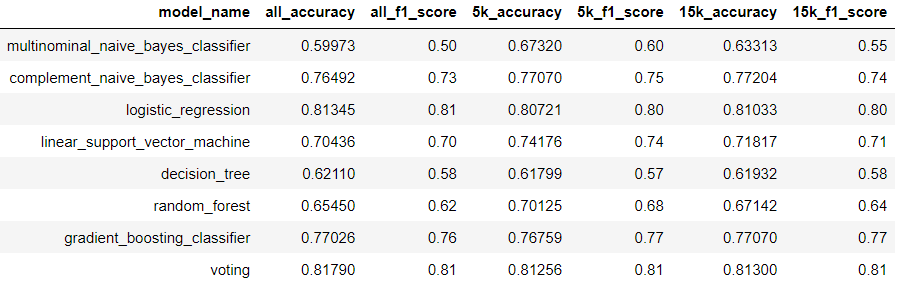

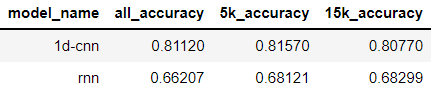

- F1과 confusion metrix는 성능을 향상시키기 위해 오류의 유형을 파악하기 위해 활용   
- 주된 모델의 성능으로는 accuracy를 쓴다.   
- 종합적으로 평가하면 분류작업에서는 단어수가 많은 것이 오히려 성능을 저하시킨다.  
  이것은 조금만 생각해보면 납득이 된다. 빈도가 아주 낮은 단어가 뉴스의 카테고리를
  결정적으로 영향을 준다고 볼 수 없다.   
- 분류문제에 있어서 단층머신러닝모델도 딥러닝모델에 못지않은 성과를 내는 것을 확인할 수 있었다.    

## 2. 차후 과제

- 모델별 성능 평가를 체계적으로 하기 위한 모듈개발